In [1]:
import pickle
import matplotlib.pyplot as plt
from array import array
import ROOT 
from ROOT import TH1D

Welcome to JupyROOT 6.24/00


In [2]:
%%cpp
TH1D fill_histo(std::vector<double> values, int n_bins, double v_min, double v_max){
    TH1D histo("h", "", n_bins, v_min, v_max);
    for (int i=0; i<values.size(); i++){
        histo.Fill(values.at(i));
    }
    return histo;
};

In [3]:
def set_hist_style(h, title, title_x, title_y):
    h.GetYaxis().SetTitle(title_y)
    h.GetYaxis().SetLabelSize(0.05)
    h.GetYaxis().SetTitleSize(0.05)
    h.GetYaxis().SetTitleOffset(1.2)
    
    h.GetXaxis().SetTitle(title_x)
    h.GetXaxis().SetLabelSize(0.05)
    h.GetXaxis().SetTitleSize(0.05)
    h.GetXaxis().SetTitleOffset(1.2)
    
    return h

In [4]:
result_dir = "/Users/mascella/workspace/disp_muon_studies/Results/"
tag = 'test'
with open(result_dir + f'result_{tag}.pkl', 'rb') as f:
    result = pickle.load(f)

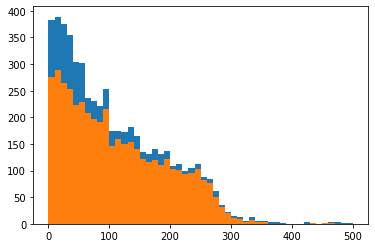

In [5]:
plt.hist(result["den_dxy_gen"]["HNL1"].value, range=[0, 500], bins=50)
plt.hist(result["num_dxy_gen"]["HNL1"].value, range=[0, 500], bins=50)
plt.show()

Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 14 points have been skipped


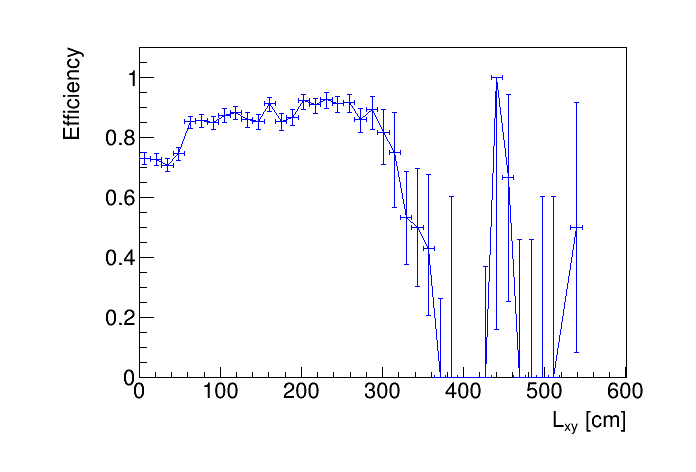

In [6]:
c = ROOT.TCanvas("c", "", 1)
tag = 'prob_cut'
with open(result_dir + f'result_{tag}.pkl', 'rb') as f:
    result = pickle.load(f)
num = array("d", result["num_dxy_gen"]["HNL1"].value)
den = array("d", result["den_dxy_gen"]["HNL1"].value)
# c = ROOT.TCanvas("c2", "", 1)
hist_num = ROOT.fill_histo(num, 50, 0, 700)
hist_den = ROOT.fill_histo(den, 50, 0, 700)
ratio = ROOT.TGraphAsymmErrors()
ratio.Divide(hist_num, hist_den)
ratio.SetLineColor(ROOT.kBlue)
ratio.SetMarkerColor(ROOT.kBlue)
# hist.SetStats(0)
ratio = set_hist_style(ratio, "", "L_{xy} [cm]", "Efficiency")
ratio.Draw()
ROOT.gPad.SetLeftMargin(0.2)
ROOT.gPad.SetBottomMargin(0.2)

# c.Print("Eff_dxy_gen_probcut_1e-3.pdf")
c.Draw()